# Binary Search Trees

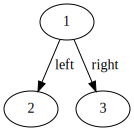

In [3]:
# root: any node without a parent
# leaf: any node without a child
# tree: a kind of DAG (directed acyclyc graph) such that it
#       has one root (no parents) and all other nodes have exactly one parent
# linked list: a tree, where each node has at MOST one child
# binary tree:  a tree, where each node has at MOST two children

from graphviz import Digraph
g = Digraph()
g.edge("1", "2", label="left")
g.edge("1", "3", label="right")
g

In [29]:
class Node:
    def __init__(self, label):
        self.label = label
        self.left = None
        self.right = None
    
    # situation 1: a function that does something (e.g., printing)
    # print all the nodes in the tree
    def dump(self, prefix="", suffix=""):
        print(prefix + str(self.label) + suffix)
        if self.left != None:
            self.left.dump(prefix+"   ", " (LEFT)")
        if self.right != None:
            self.right.dump(prefix+"   ", " (RIGHT)")
            
    # situation 2: a function that returns something
    # will tell us if a given value is in the tree
    def search(self, target):
        print("CHECK", self.label)
        if self.label == target:
            return True
        if self.left != None:
            if self.left.search(target):
                return True 
        if self.right != None:
            if self.right.search(target):
                return True
        return False

node1 = Node(1)
node2 = Node(2)
node4 = Node(4)
node3 = Node(3)
node1.left = node2
node1.right = node3
node2.left = node4

node1.dump()
node1.search(9) # should be True

# say we have N nodes, how many nodes do we have to check in the worst case?
# O(N) complexity for search

1
   2 (LEFT)
      4 (LEFT)
   3 (RIGHT)
CHECK 1
CHECK 2
CHECK 4
CHECK 3


False

In [37]:
class Node:
    def __init__(self, label):
        self.label = label
        self.left = None
        self.right = None
    
    # situation 1: a function that does something (e.g., printing)
    # print all the nodes in the tree
    def dump(self, prefix="", suffix=""):
        print(prefix + str(self.label) + suffix)
        if self.left != None:
            self.left.dump(prefix+"   ", " (LEFT)")
        if self.right != None:
            self.right.dump(prefix+"   ", " (RIGHT)")
            
    # situation 2: a function that returns something
    # will tell us if a given value is in the tree
    def search(self, target):
        print("CHECK", self.label)
        self.dump()
        if self.label == target:
            return True

        if target < self.label:
            if self.left != None:
                if self.left.search(target):
                    return True 
        elif target > self.label:
            if self.right != None:
                if self.right.search(target):
                    return True
            
        return False

root = Node(10)
root.left = Node(2)
root.left.left = Node(1)
root.left.right = Node(4)
root.left.right.left = Node(3)
root.left.right.right = Node(8)
root.right = Node(15)
root.right.left = Node(12)
root.right.right = Node(19)
#root.right.left.left = Node(8)
#root.dump()
root.search(11)

CHECK 10
10
   2 (LEFT)
      1 (LEFT)
      4 (RIGHT)
         3 (LEFT)
         8 (RIGHT)
   15 (RIGHT)
      12 (LEFT)
      19 (RIGHT)
CHECK 15
15
   12 (LEFT)
   19 (RIGHT)
CHECK 12
12


False

In [ ]:
# Binary search trees (BST), things to know:
# 1. BST rule: a node's value is bigger than all the values in it's left subtree
#               and it value is smaller than all the values in a right subtree
# 2. how to search in a BST efficiently
# 3. how to write code to build a BST correctly